# Comparison number of layers

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('../results/output/CF_conv_3_4_5.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
cf_3 = []
cf_4 = []
cf_5 = []

std_3 = []
std_4 = []
std_45= []

std_3 = []
std_4 = []
std_5 = []

for i in [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0]:
    cf_3.append(np.mean(data['conv_3']['cf_' + str(i)]))
    cf_4.append(np.mean(data['conv_4']['cf_' + str(i)]))
    cf_5.append(np.mean(data['conv_5']['cf_' + str(i)]))
    std_3.append(np.std(data['conv_3']['cf_' + str(i)]))
    std_4.append(np.std(data['conv_4']['cf_' + str(i)]))
    std_5.append(np.std(data['conv_5']['cf_' + str(i)]))

<ipython-input-3-5562a81c1913>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


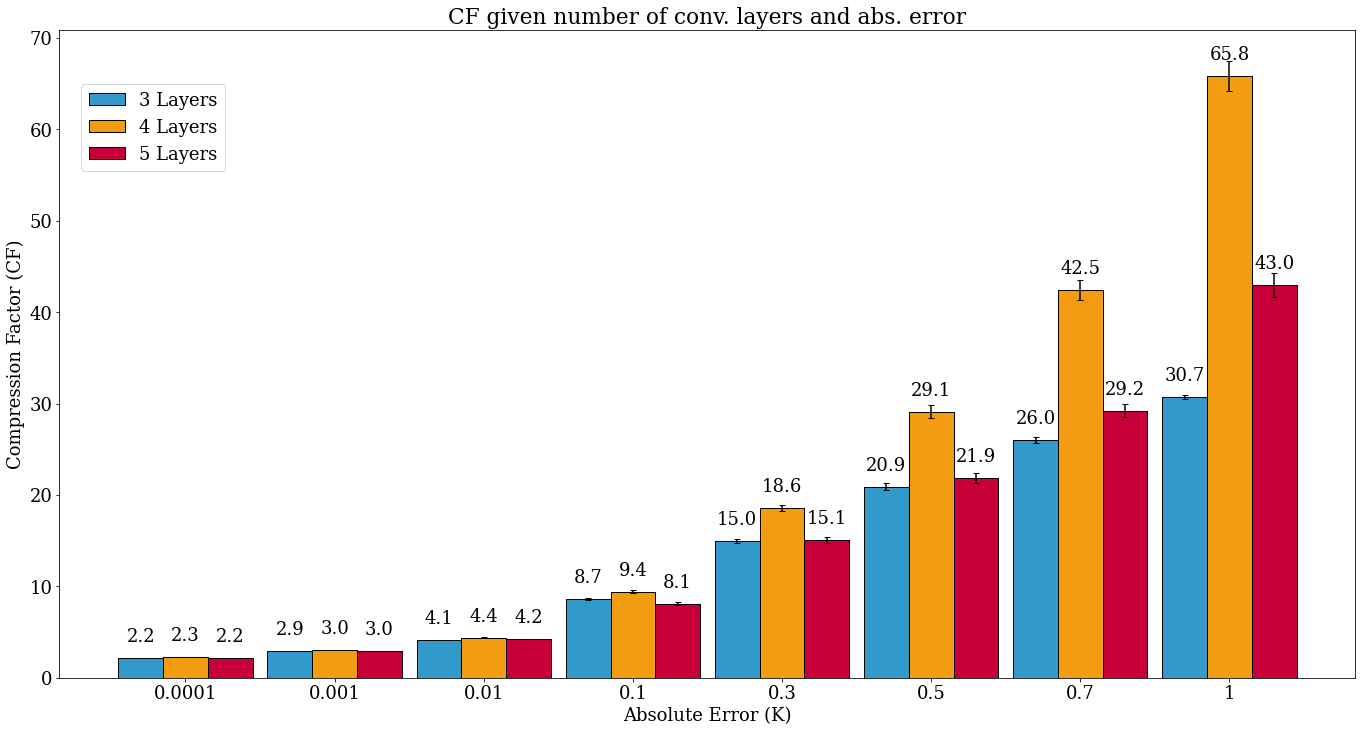

In [3]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.family"] = "serif"
fig = plt.figure(figsize=(18,9))
cf = np.arange(8)
ax = fig.add_axes([0,0,1,1])
pps = ax.bar(cf - 0.30, cf_3, width = 0.30, yerr= std_3, label = '3 Layers', color = '#319ACB',  capsize = 3,
       edgecolor = 'k')
pps1= ax.bar(cf + 0.00, cf_4, width = 0.30, yerr= std_4,label = '4 Layers', color = '#F39C12', capsize = 3,
       edgecolor = 'k')
pps2 = ax.bar(cf + 0.30, cf_5, width = 0.30, yerr= std_5, label = '5 Layers', color = '#C70039', capsize = 3,
       edgecolor = 'k')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:8] = ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1']
width = 0.30
for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+1),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
for p in pps1:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+1),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    
for p in pps2:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+1),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.set_xticklabels(labels)
fig.legend(bbox_to_anchor=(0.01, 1.03, 1, -0.1), loc=2,
           ncol=1)
#plt.grid()
plt.xlabel('Absolute Error (K)')
plt.ylabel('Compression Factor (CF)')
plt.title('CF given number of conv. layers and abs. error')
plt.savefig('num_layers.png' ,dpi=300,bbox_inches='tight')

In [4]:
latent_space_3 = []
latent_space_4 = []
latent_space_5 = []
    
error_space_3 = []
error_space_4 = []
error_space_5 = []
    
mask_space_3 = []
mask_space_4 = []
mask_space_5 = []

for i in [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0]:
    latent_space_3.append(np.mean(data['conv_3']['mask_' + str(i)]))
    error_space_3.append(np.mean(data['conv_3']['error_' + str(i)]))
    mask_space_3.append(np.mean(data['conv_3']['latent_' + str(i)]))
    
    latent_space_4.append(np.mean(data['conv_4']['mask_' + str(i)]))
    error_space_4.append(np.mean(data['conv_4']['error_' + str(i)]))
    mask_space_4.append(np.mean(data['conv_4']['latent_' + str(i)]))
    
    latent_space_5.append(np.mean(data['conv_5']['mask_' + str(i)]))
    error_space_5.append(np.mean(data['conv_5']['error_' + str(i)]))
    mask_space_5.append(np.mean(data['conv_5']['latent_' + str(i)]))


## 3 convolutions

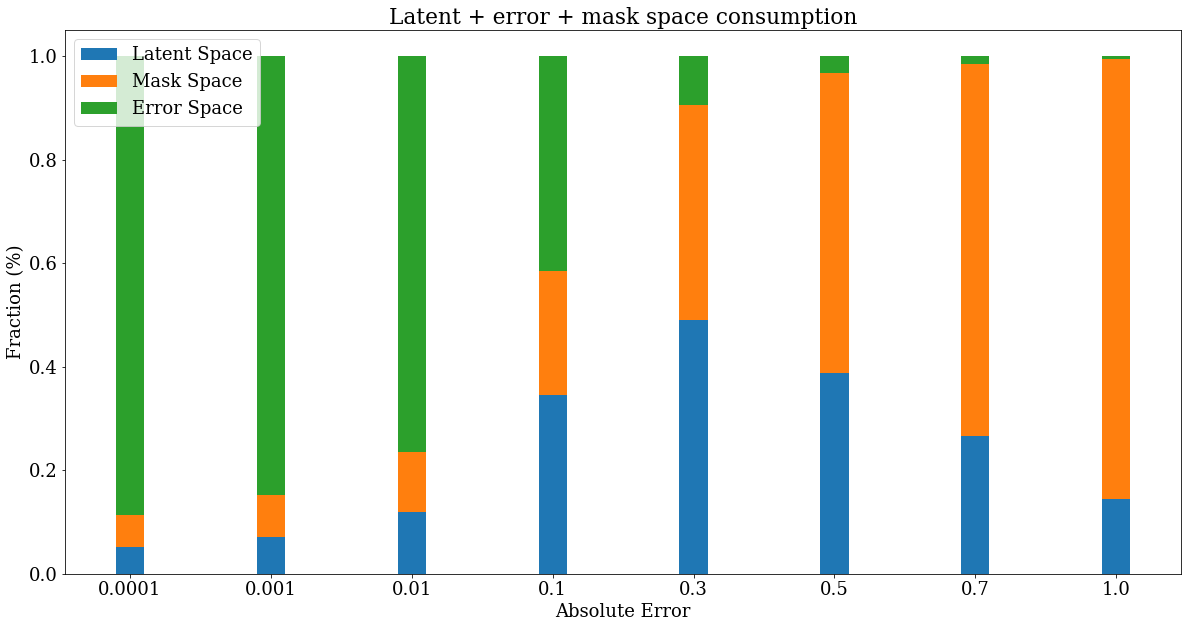

In [5]:
#plt.figure(figsize=(20,10))

width = 0.20# the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))


ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], latent_space_3, width,  label='Latent Space')
ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], mask_space_3, width,  bottom = latent_space_3,
       label='Mask Space')
ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], error_space_3, width,  label='Error Space', bottom =np.array(latent_space_3)+np.array(mask_space_3))


ax.set_ylabel('Fraction (%)')
ax.set_xlabel('Absolute Error')
ax.set_title('Latent + error + mask space consumption')
ax.legend()

## 4 convolutions

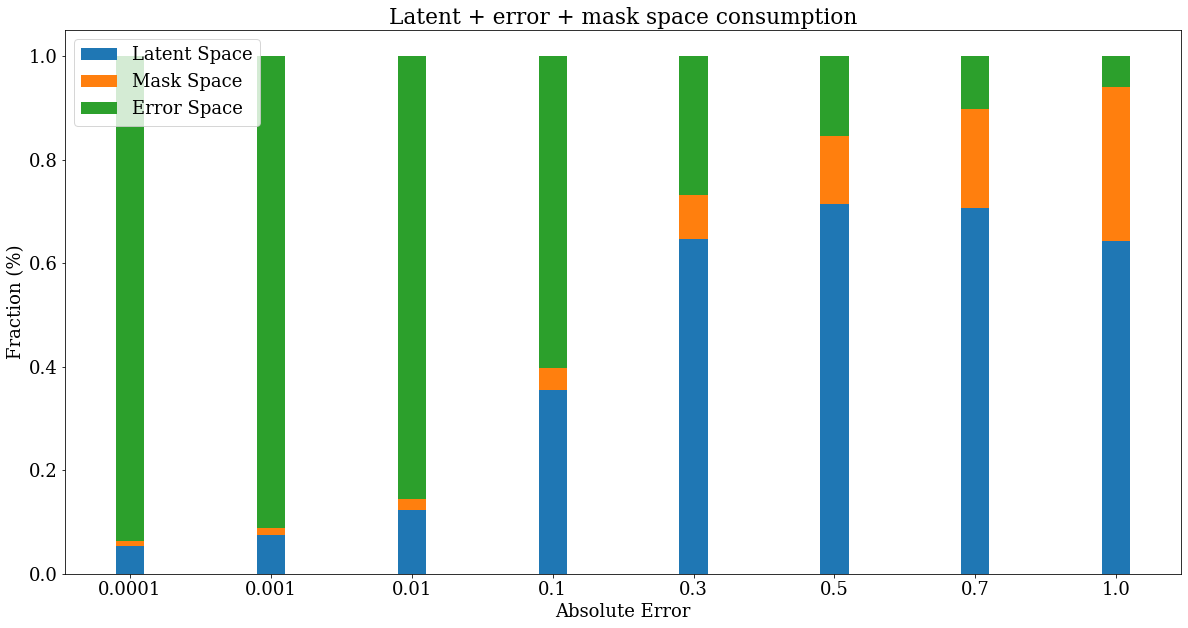

In [6]:
width = 0.20# the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))


ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], latent_space_4, width,  label='Latent Space')
ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], mask_space_4, width,  bottom = latent_space_4,
       label='Mask Space')
ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], error_space_4, width,  label='Error Space', bottom =np.array(latent_space_4)+np.array(mask_space_4))


ax.set_ylabel('Fraction (%)')
ax.set_xlabel('Absolute Error')
ax.set_title('Latent + error + mask space consumption')
ax.legend()

## 5 convolutions

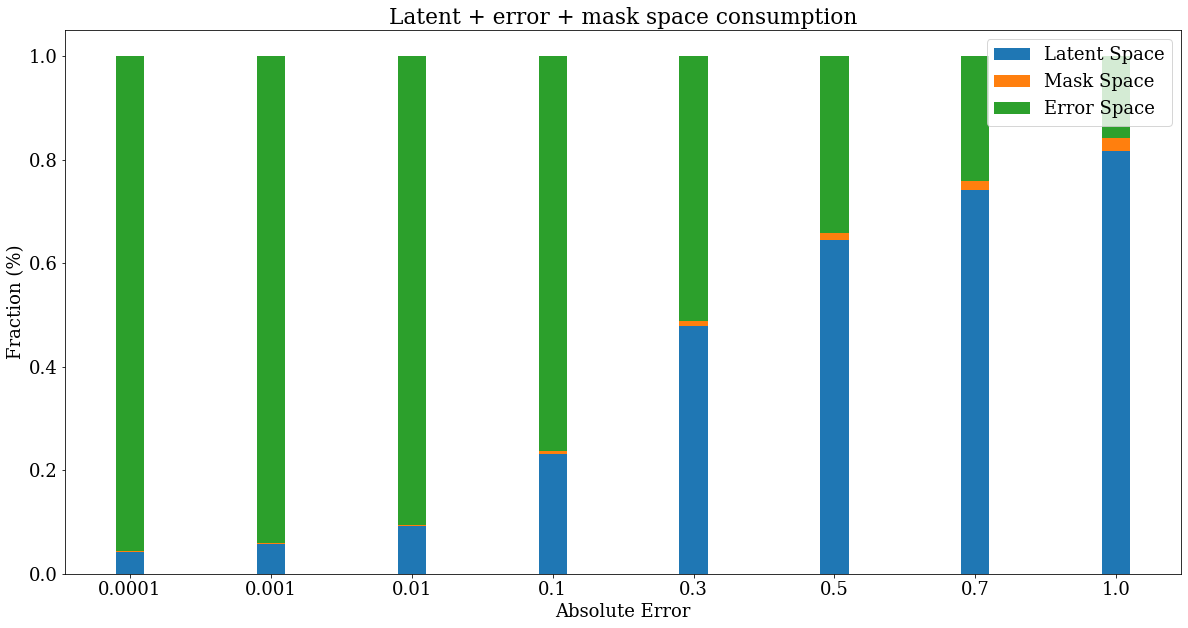

In [7]:
width = 0.20# the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))


ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], latent_space_5, width,  label='Latent Space')
ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], mask_space_5, width,  bottom = latent_space_5,
       label='Mask Space')
ax.bar( ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0'], error_space_5, width,  label='Error Space', bottom =np.array(latent_space_5)+np.array(mask_space_5))


ax.set_ylabel('Fraction (%)')
ax.set_xlabel('Absolute Error')
ax.set_title('Latent + error + mask space consumption')
ax.legend()

## Compression of data only using bzip2

In [ ]:
import bz2
import xarray as xr
data_or = xr.open_mfdataset('/p/home/jusers/donayreholtz1/hdfml/MyProjects/PROJECT_haf/data/ECMWF/1980/*/temperature.nc', combine='by_coords')
data_or = data_or.sel(time=slice('1980-03-11T01:00:00','1980-03-12T8:00:00'), level = slice(985,1000))
data_or = data_or.transpose('time', 'latitude', 'longitude', 'level')
data_or = data_or.t.values

compress = bz2.compress(data_or)

print("Compression factor Bzip2:", data_or.nbytes/ len(compress))

# Comparison latitude, longitude and land-sea mask as extra information

## Comparing Training and Validation loses.

In [16]:
with open('../results/models/basic_model/model-history.pkl', 'rb') as f:
    data = pickle.load(f)
basic_loss = data['model']['loss']
basic_val_loss = data['model']['val_loss']


In [17]:
with open('../results/models/coords_model/model-history.pkl', 'rb') as f:
    data = pickle.load(f)
latlon_loss = data['model']['loss']
latlon_val_loss = data['model']['val_loss']

In [19]:
with open('../results/models/landsea_model/model-history.pkl', 'rb') as f:
    data = pickle.load(f)
soil_loss = data['model']['loss']
soil_val_loss = data['model']['val_loss']

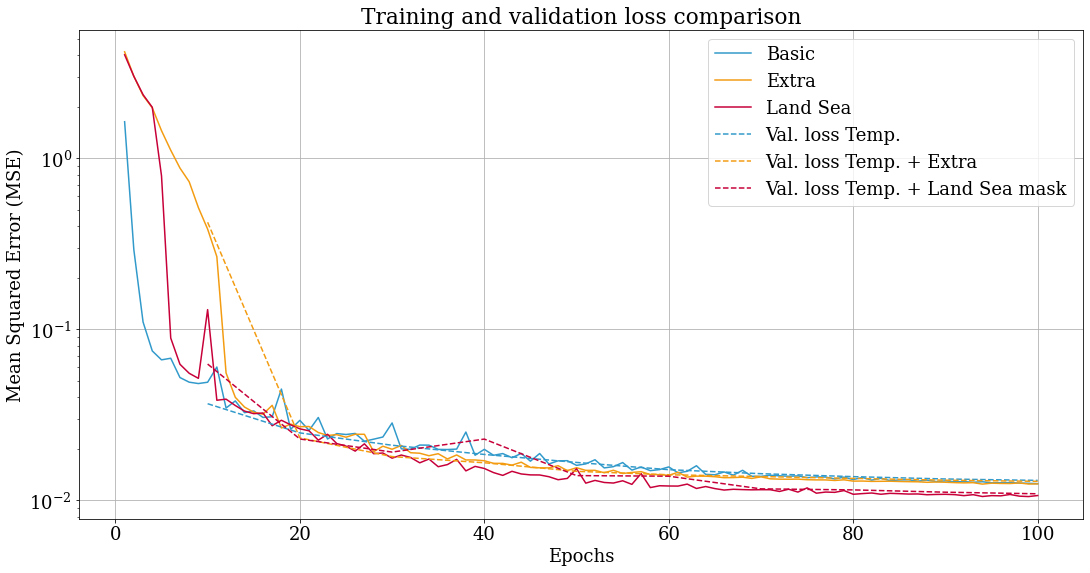

In [20]:
plt.figure(figsize=(18,9))
plt.rcParams.update({'font.size': 18})
epochs = range(1,len(basic_loss)+1)
# Loss
plt.plot(epochs, basic_loss, 'g', label = "Basic", color = '#319ACB')
plt.plot(epochs, latlon_loss, 'r', label = "Extra", color = '#F39C12')
plt.plot(epochs, soil_loss, 'b', label = "Land Sea", color = '#C70039')
epochs = range(10,len(basic_loss)+10, len(basic_val_loss))
# Validation Loss
plt.plot(epochs, basic_val_loss, '--g', label = "Val. loss Temp.", color= '#319ACB')
plt.plot(epochs, latlon_val_loss, '--r', label = "Val. loss Temp. + Extra", color = '#F39C12')
plt.plot(epochs, soil_val_loss, '--b', label = "Val. loss Temp. + Land Sea mask", color = '#C70039')

plt.yscale('log')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and validation loss comparison')
plt.legend()
plt.savefig('val_loss_info.png' ,dpi=300,bbox_inches='tight')

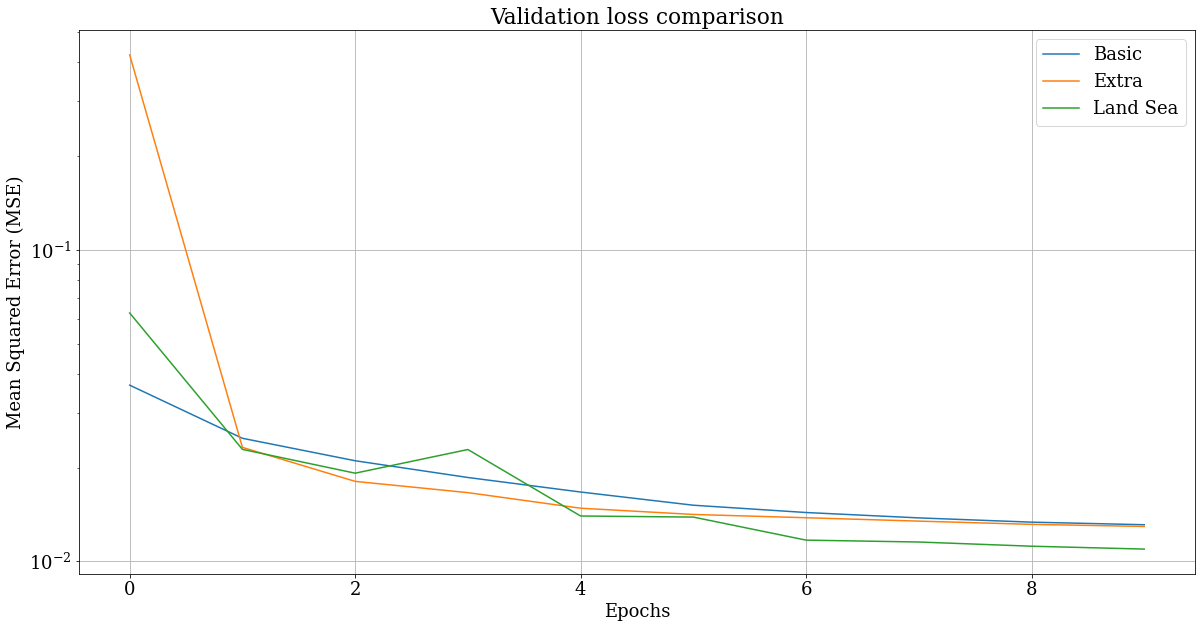

In [21]:
plt.figure(figsize=(20,10))

epochs = range(len(basic_val_loss))
plt.plot(epochs, basic_val_loss, label = "Basic")
plt.plot(epochs, latlon_val_loss, label = "Extra")
plt.plot(epochs, soil_val_loss, label = "Land Sea")
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation loss comparison')
plt.grid()
plt.legend()

## Comparing the compression factor gotten with the 3 models

In [27]:
with open('../results/output/CF_conv_modes.pkl', 'rb') as f:
    data = pickle.load(f)

In [28]:
cf_basic = [] 
cf_soil = []
cf_extra = []

cf_std_basic = [] 
cf_std_soil = []
cf_std_extra = []


for i in data['conv_basic'].keys():
    cf_basic.append(np.mean(data['conv_basic'][i]))
    cf_soil.append(np.mean(data['conv_soil'][i]))
    cf_extra.append(np.mean(data['conv_extra'][i]))
    
    
    #std
    cf_std_basic.append(np.std(data['conv_basic'][i]))
    cf_std_soil.append(np.std(data['conv_soil'][i]))
    cf_std_extra.append(np.std(data['conv_extra'][i]))


<ipython-input-29-1d4bf1ee9381>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


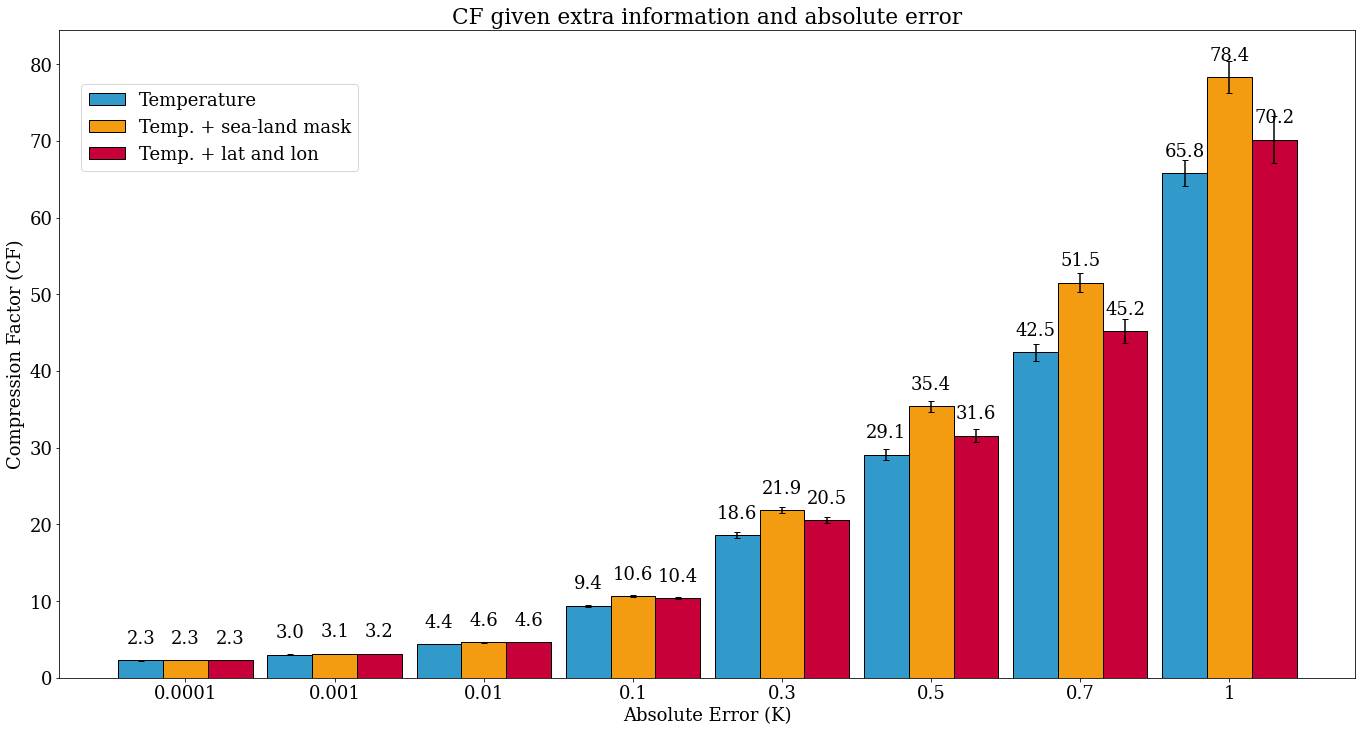

In [29]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(18,9))
cf = np.arange(8)
ax = fig.add_axes([0,0,1,1])
pps = ax.bar(cf - 0.30, cf_basic, width = 0.30, yerr = cf_std_basic ,label = 'Temperature', color = '#319ACB', capsize = 3,
       edgecolor = 'k')
pps1= ax.bar(cf + 0.00, cf_soil, width = 0.30, yerr =cf_std_soil,label = 'Temp. + sea-land mask', color = '#F39C12', capsize = 3,
       edgecolor = 'k')
pps2 = ax.bar(cf + 0.30, cf_extra, width = 0.30, yerr =cf_std_extra, label = 'Temp. + lat and lon', color = '#C70039', capsize = 3,
       edgecolor = 'k')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:8] = ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1']
width = 0.30
for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+1),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
for p in pps1:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+1),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    
for p in pps2:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+1),
      xytext=(0, 5), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.set_xticklabels(labels)
fig.legend(bbox_to_anchor=(0.01, 1.03, 1, -0.1), loc=2,
           ncol=1)
#plt.grid()
plt.xlabel('Absolute Error (K)')
plt.ylabel('Compression Factor (CF)')
plt.title('CF given extra information and absolute error')
plt.savefig('cd_info.png' ,dpi=300,bbox_inches='tight')